In [1]:
import pandas as pd
df = pd.read_csv("gold_silver.csv")

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
x1 = np.array(df[['Silver_Price']])
x2 = np.array(df[['Gold_price']])
x = np.array(df.iloc[:,0:2])
print(x1)
y = df.iloc[:,-1]
y

[[ 2715]
 [ 2720]
 [ 3105]
 [ 3570]
 [ 3955]
 [ 4015]
 [ 4794]
 [ 6066]
 [ 6755]
 [ 6463]
 [ 6646]
 [ 8040]
 [ 5489]
 [ 7124]
 [ 6335]
 [ 7346]
 [ 7345]
 [ 8560]
 [ 7615]
 [ 7900]
 [ 7215]
 [ 7875]
 [ 7695]
 [11770]
 [10675]
 [17405]
 [19520]
 [23625]
 [22165]
 [27255]
 [56900]
 [56290]
 [54030]
 [43070]
 [37825]
 [36990]
 [37825]
 [41400]
 [40600]
 [63435]]


0      1800
1      1970
2      2130
3      2140
4      2570
5      3130
6      3140
7      3200
8      3466
9      4045
10     4140
11     4234
12     4300
13     4334
14     4400
15     4598
16     4680
17     4725
18     4990
19     5160
20     5600
21     5850
22     7000
23     8400
24    10800
25    12500
26    14500
27    18500
28    26343
29    26400
30    28006
31    28623
32    29600
33    29667
34    31050
35    31438
36    35220
37    48651
38    50045
39    52950
Name: Gold_price, dtype: int64

**implementation by sklearn :**

In [4]:
print(x)

[[ 2715  1981]
 [ 2720  1982]
 [ 3105  1983]
 [ 3570  1984]
 [ 3955  1985]
 [ 4015  1986]
 [ 4794  1987]
 [ 6066  1988]
 [ 6755  1989]
 [ 6463  1990]
 [ 6646  1991]
 [ 8040  1992]
 [ 5489  1993]
 [ 7124  1994]
 [ 6335  1995]
 [ 7346  1996]
 [ 7345  1997]
 [ 8560  1998]
 [ 7615  1999]
 [ 7900  2000]
 [ 7215  2001]
 [ 7875  2002]
 [ 7695  2003]
 [11770  2004]
 [10675  2005]
 [17405  2006]
 [19520  2007]
 [23625  2008]
 [22165  2009]
 [27255  2010]
 [56900  2011]
 [56290  2012]
 [54030  2013]
 [43070  2014]
 [37825  2015]
 [36990  2016]
 [37825  2017]
 [41400  2018]
 [40600  2019]
 [63435  2020]]


In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [6]:
print(x_train.shape)
print(y_train.shape)

(32, 2)
(32,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
regr = LinearRegression()
model = regr.fit(x_train,y_train)

In [9]:
df['Y_hat'] = model.predict(x)
predictions = model.predict(x_test)

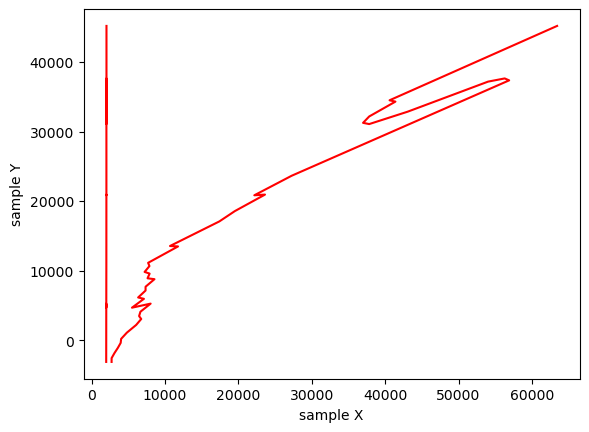

In [10]:
from matplotlib import pyplot as plt
plt.plot(x,model.predict(x),color = 'red')
plt.xlabel('sample X')
plt.ylabel('sample Y')
plt.show()

In [11]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('root_mean_squared_error : ', np.sqrt(mean_squared_error(y_test, predictions)))

mean_squared_error :  12785561.387563376
root_mean_squared_error :  3575.6903372025067


In [12]:
ans_by_sklearn = model.predict([[1990.97022593,2024]])
print(ans_by_sklearn)

[20078.97722582]


In [13]:
df['Gold_price'].size

40

**implementation by normal method**

In [14]:
df['x2_square'] = df['Year']*df['Year']
sum_x2_square = (np.sum(df['x2_square'])) - ((np.sum(df['Year'])*np.sum(df['Year']))/df['Year'].size)
df['x1_square'] = df['Silver_Price']*df['Silver_Price']
sum_x1_square = (np.sum(df['x1_square'])) - ((np.sum(df['Silver_Price'])*np.sum(df['Silver_Price']))/df['Silver_Price'].size)
df['x1_y'] = df['Silver_Price']*df['Gold_price']
sum_x1_y = (np.sum(df['x1_y'])) - ((np.sum(df['Silver_Price'])*np.sum(df['Gold_price']))/df['Gold_price'].size)
df['x1_x2'] = df['Silver_Price'] * df['Year']
sum_x1_x2 = (np.sum(df['x1_x2'])) - ((np.sum(df['Silver_Price'])*np.sum(df['Year']))/df['Year'].size)
df['x2_y'] = df['Gold_price'] * df['Year']
sum_x2_y = (np.sum(df['x2_y'])) - ((np.sum(df['Year'])*np.sum(df['Gold_price']))/df['Gold_price'].size)

In [15]:
df.head()

,Silver_Price,Year,Gold_price,Y_hat,x2_square,x1_square,x1_y,x1_x2,x2_y
0,2715,1981,1800,-3131.783745,3924361,7371225,4887000,5378415,3565800
1,2720,1982,1970,-2582.293931,3928324,7398400,5358400,5391040,3904540
2,3105,1983,2130,-1863.933662,3932289,9641025,6613650,6157215,4223790
3,3570,1984,2140,-1110.021717,3936256,12744900,7639800,7082880,4245760
4,3955,1985,2570,-391.661448,3940225,15642025,10164350,7850675,5101450


In [16]:
b1 = ((sum_x2_square * sum_x1_y)-(sum_x1_x2 * sum_x2_y))/((sum_x1_square * sum_x2_square)-(sum_x1_x2 * sum_x1_x2))

In [17]:
b2 = ((sum_x1_square * sum_x2_y)-(sum_x1_x2 * sum_x1_y))/((sum_x1_square * sum_x2_square)-(sum_x1_x2 * sum_x1_x2))

In [18]:
print(b1)

0.48121157275102827


In [19]:
print(b2)

495.99072945961944


In [20]:
mean_x1 = np.sum(df['Silver_Price'])/df['Silver_Price'].size
mean_x2 = np.sum(df['Year'])/df['Year'].size
mean_y = np.sum(df['Gold_price'])/df['Gold_price'].size

In [21]:
b0 = mean_y - (b1*mean_x1) - (b2*mean_x2)
print(b0)

-986775.9731054489


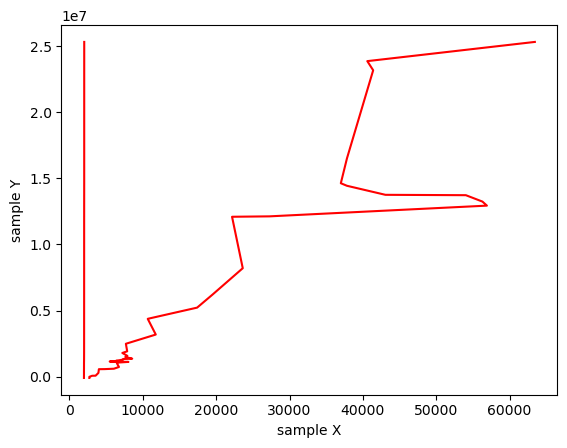

In [22]:
from matplotlib import pyplot as plt
plt.plot(x,(b0 + (b1*x1) + (b2*x2)),color = 'red')
plt.xlabel('sample X')
plt.ylabel('sample Y')
plt.show()

In [23]:
ans_by_imple = (b0 + (b1*1990.97022593) + (b2*2024))
print(ans_by_imple)

18067.34123454115


**NORMAL IMPLEMENTATION : 18607.34123**<p>&nbsp;</p>
**SGD IMPLEMENTATION : 20078.97722582**<p>&nbsp;</p>
**THEREFORE THERE WAS AN ERROR OF 1471.6359912789.**